In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [94]:
t = np.linspace(0, 10, 100)
e = np.random.normal(0, 2, 100)
x = []
for i in range(100):
    if i < 50:
        x.append(2*t[i] + e[i])
    else:
        x.append(30 - 1.5*t[i] + e[i]) 

In [95]:
df = pd.DataFrame(t, columns=['t_'])
df['x'] = x

In [96]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t_,0.000000,0.101010,0.202020,0.303030,0.404040,0.505051,0.606061,0.707071,0.808081,0.909091,...,9.090909,9.191919,9.292929,9.393939,9.494949,9.595960,9.696970,9.797980,9.898990,10.000000
x,3.459798,4.221453,0.032676,-1.798808,1.758107,1.948181,3.166970,3.867210,1.452203,0.816238,...,19.113221,16.045475,12.471380,14.810260,19.770051,10.447314,16.967787,16.643965,18.453446,15.273632


In [97]:
H_T = np.array([[1 for i in range(100)], df['t_']])
H = H_T.T
H.shape, H_T.shape
W = np.dot(H_T, H)
W = np.linalg.inv(W)
HX = np.dot(H_T, df.x)
tetha = np.dot(W, HX)
print('МНК-оценка:', tetha[0], tetha[1])

МНК-оценка: 2.048148461330541 1.9891456046243023


In [99]:
df['e'] = df.x - np.array([tetha[0]+tetha[1]*i for i in df.t_])
df['e2'] = df.e**2

In [119]:
print('МНК-оценка:', tetha[0], tetha[1])
sigma_e2 = df['e2'].sum()/(100-2)
print(f'Несмещенная оценка квадратов ошибки для МНК - {sigma_e2}')

МНК-оценка: 2.048148461330541 1.9891456046243023
Несмещенная оценка квадратов ошибки для МНК - 20.767403401973635


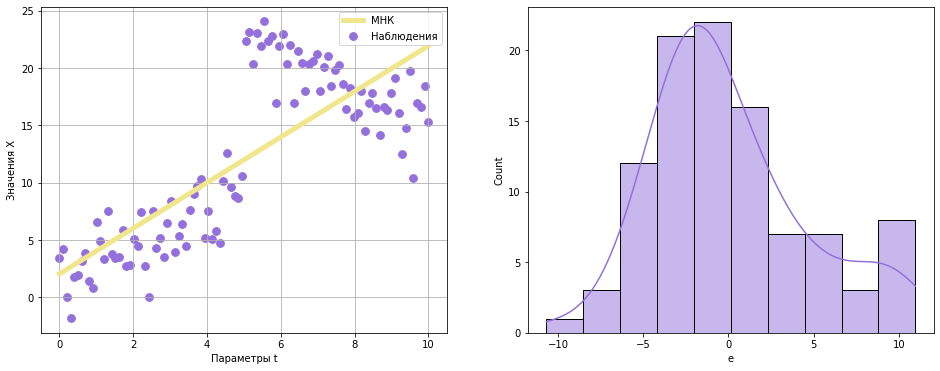

In [109]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].scatter(df.t_, df.x, color='mediumpurple', s=60, label='Наблюдения')
ax[0].plot(df.t_, [tetha[0]+tetha[1]*i for i in t], color='khaki', linewidth = 5, label='МНК')
sns.histplot(data=df, x="e", kde=True, color='mediumpurple', ax=ax[1])
ax[0].set_xlabel('Параметры t')
ax[0].set_ylabel('Значения Х')
ax[0].grid()
ax[0].legend()
plt.show()

In [110]:
rdd_df = df.assign(threshold=(df["t_"] > 5).astype(int))
model = smf.wls("x~t_*threshold", rdd_df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.5294,0.568,2.691,0.008,0.401,2.658
t_,1.5176,0.198,7.668,0.000,1.125,1.910
threshold,28.8099,1.620,17.785,0.000,25.594,32.025
t_:threshold,-3.0639,0.280,-10.947,0.000,-3.619,-2.508


In [113]:
predictions = model.fittedvalues

In [114]:
df['e_'] = df.x - predictions
df['e2_'] = df.e_**2

In [116]:
sigma_e2 = df['e2_'].sum()/(100-2)
print(f'Несмещенная оценка квадратов ошибки для МНК - {sigma_e2}')

Несмещенная оценка квадратов ошибки для МНК - 4.075899397054674


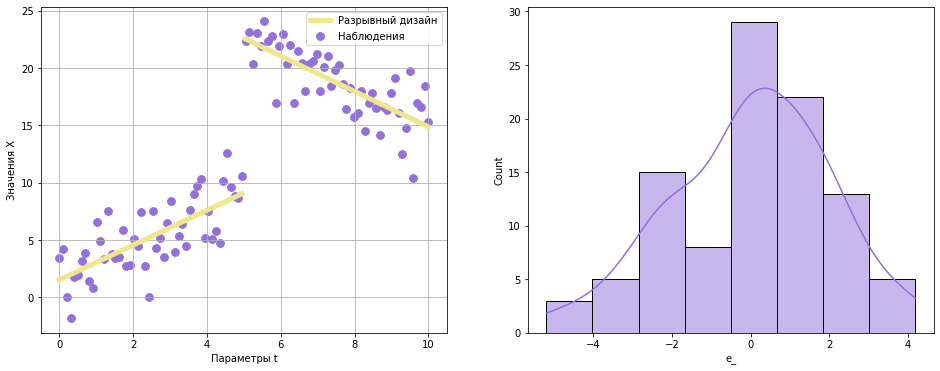

In [117]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].scatter(t, x, color='mediumpurple', s=60, label='Наблюдения')
ax[0].plot(df.t_[0:50], predictions[0:50], color='khaki', linewidth = 5, label='Разрывный дизайн')
ax[0].plot(df.t_[50:], predictions[50:], color='khaki', linewidth = 5)
sns.histplot(data=df, x="e_", kde=True, color='mediumpurple', ax=ax[1])
ax[0].set_xlabel('Параметры t')
ax[0].set_ylabel('Значения Х')
ax[0].grid()
ax[0].legend()
plt.show()